In [26]:
import pandas as pd

In [51]:
data = pd.read_csv('Exam_Score_Prediction.csv')
data = data.drop('student_id',axis=1)
data

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [52]:
# Null check
data.isna().sum()

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


In [54]:
data.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


In [69]:
dataset = data.copy()

In [70]:
# univariate
from Univariate import UnivariateBuilder
quan,qual = UnivariateBuilder.quanQualFinder(data)
print("quan:",quan)
print("qual:",qual)

quan: ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
qual: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']


In [71]:
descriptive = pd.DataFrame(index = ["Mean","Median","Mode","Q1:25%",
                                    "Q2:50%","Q3:75%","98%","Q4:100%","IQR","1.5Rule","Lesser","Grather","Min","Max"                               
                                   ],columns=quan)
descriptive

,age,study_hours,class_attendance,sleep_hours,exam_score
Mean,NaN,NaN,NaN,NaN,NaN
Median,NaN,NaN,NaN,NaN,NaN
Mode,NaN,NaN,NaN,NaN,NaN
Q1:25%,NaN,NaN,NaN,NaN,NaN
Q2:50%,NaN,NaN,NaN,NaN,NaN
Q3:75%,NaN,NaN,NaN,NaN,NaN
98%,NaN,NaN,NaN,NaN,NaN
Q4:100%,NaN,NaN,NaN,NaN,NaN
IQR,NaN,NaN,NaN,NaN,NaN
1.5Rule,NaN,NaN,NaN,NaN,NaN


In [72]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

for colName in quan:
    descriptive[colName]['Mean'] = dataset[colName].mean()
    descriptive[colName]['Median'] = dataset[colName].median()
    descriptive[colName]['Mode'] = dataset[colName].mode()[0]
    descriptive[colName]['Q1:25%'] = dataset.describe()[colName]["25%"]
    descriptive[colName]['Q2:50%'] = dataset.describe()[colName]["50%"]
    descriptive[colName]['Q3:75%'] = dataset.describe()[colName]["75%"]
    descriptive[colName]['98%'] = np.percentile(dataset[colName],98)
    descriptive[colName]['Q4:100%'] = dataset.describe()[colName]["max"]
    descriptive[colName]['IQR'] = descriptive[colName]['Q3:75%'] - descriptive[colName]['Q1:25%']
    descriptive[colName]['1.5Rule'] = 1.5 * descriptive[colName]['IQR']
    descriptive[colName]['Lesser'] = descriptive[colName]['Q1:25%'] - descriptive[colName]['1.5Rule'] #Q1-1.5*IQR = Q1-descriptive[colName]['1.5Rule']
    descriptive[colName]['Grather'] = descriptive[colName]['Q3:75%'] + descriptive[colName]['1.5Rule'] #Q3+1.5*IQR = Q1-descriptive[colName]['1.5Rule']
    descriptive[colName]['Min'] = dataset[colName].min() #Min values have to calc from dataset
    descriptive[colName]['Max'] = dataset[colName].max() #Max values have to calc from dataset

In [73]:
descriptive

,age,study_hours,class_attendance,sleep_hours,exam_score
Mean,20.4733,4.007604,70.017365,7.00856,62.513225
Median,20.0,4.04,69.9,7.0,62.6
Mode,21,7.91,40.6,4.1,100.0
Q1:25%,18.0,2.0,55.1,5.5,48.8
Q2:50%,20.0,4.04,69.9,7.0,62.6
Q3:75%,22.0,6.0,85.0,8.5,76.3
98%,24.0,7.84,98.8,9.9,100.0
Q4:100%,24.0,7.91,99.4,9.9,100.0
IQR,4.0,4.0,29.9,3.0,27.5
1.5Rule,6.0,6.0,44.85,4.5,41.25


In [74]:
lessorCol=[]
greaterCol=[]

for colName in quan:
    if(descriptive[colName]["Lesser"] >  descriptive[colName]["Min"]):
        lessorCol.append(colName)

    if(descriptive[colName]["Grather"] <  descriptive[colName]["Max"]):
     greaterCol.append(colName)

In [75]:
print('lessorCol',lessorCol)
print('greaterCol',greaterCol)

lessorCol []
greaterCol []


In [76]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(dataset[quan])
df = imp.transform(dataset[quan])
df = pd.DataFrame(df,columns=quan)

In [77]:
df

,age,study_hours,class_attendance,sleep_hours,exam_score
0,17.0,2.78,92.9,7.4,58.9
1,23.0,3.37,64.8,4.6,54.8
2,22.0,7.88,76.8,8.5,90.3
3,20.0,0.67,48.4,5.8,29.7
4,20.0,0.89,71.6,9.8,43.7
...,...,...,...,...,...
19995,18.0,6.50,71.3,5.0,86.5
19996,18.0,3.71,41.6,5.9,60.9
19997,19.0,7.88,68.2,4.6,64.5
19998,19.0,4.60,76.3,6.1,79.0


In [78]:
cate = data[qual]
cate

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
0,male,diploma,yes,poor,coaching,low,hard
1,other,bca,yes,average,online videos,medium,moderate
2,male,b.sc,yes,poor,coaching,high,moderate
3,other,diploma,yes,average,online videos,low,moderate
4,female,diploma,yes,poor,coaching,low,moderate
...,...,...,...,...,...,...,...
19995,other,bba,yes,good,self-study,low,easy
19996,male,b.com,no,average,coaching,medium,moderate
19997,other,diploma,yes,poor,group study,low,easy
19998,male,bba,no,good,self-study,medium,moderate


In [79]:
preprocessed = pd.concat([df,cate],axis=1)
preprocessed

,age,study_hours,class_attendance,sleep_hours,exam_score,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
0,17.0,2.78,92.9,7.4,58.9,male,diploma,yes,poor,coaching,low,hard
1,23.0,3.37,64.8,4.6,54.8,other,bca,yes,average,online videos,medium,moderate
2,22.0,7.88,76.8,8.5,90.3,male,b.sc,yes,poor,coaching,high,moderate
3,20.0,0.67,48.4,5.8,29.7,other,diploma,yes,average,online videos,low,moderate
4,20.0,0.89,71.6,9.8,43.7,female,diploma,yes,poor,coaching,low,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18.0,6.50,71.3,5.0,86.5,other,bba,yes,good,self-study,low,easy
19996,18.0,3.71,41.6,5.9,60.9,male,b.com,no,average,coaching,medium,moderate
19997,19.0,7.88,68.2,4.6,64.5,other,diploma,yes,poor,group study,low,easy
19998,19.0,4.60,76.3,6.1,79.0,male,bba,no,good,self-study,medium,moderate


In [80]:
preprocessed.isna().sum()

age                 0
study_hours         0
class_attendance    0
sleep_hours         0
exam_score          0
gender              0
course              0
internet_access     0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
dtype: int64

<Axes: xlabel='exam_score', ylabel='Density'>

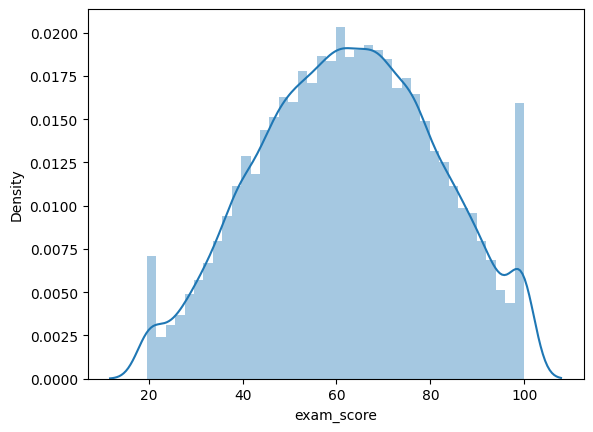

In [131]:
import seaborn as sns
sns.distplot(dataset['exam_score'])

In [87]:
def get_PDF_probablity(dataset,startRange,endRange):
    import seaborn as sns
    from matplotlib import pyplot
    from scipy.stats import norm
    sns.distplot(dataset, kde=True,kde_kws={'color':'Blue'},color='Green')
    pyplot.axvline(startRange,color='Red')
    pyplot.axvline(endRange,color='Red')

    #mean & std calc parameter
    sample = dataset
    mean = sample.mean()
    std=sample.std()

    #define distribution
    dist = norm(mean,std)

    #sample probablities for a range of outcomes
    values = [value for value in range(startRange,endRange)]
    probablities = [dist.pdf(value) for value in values]
    prop = sum(probablities)
    print('probablities',probablities)
    return prop

probablities [0.00733474132098162, 0.006782489757074476, 0.006254301119363187, 0.005751137130044155, 0.005273682198080596, 0.004822358379716906, 0.004397342625596133, 0.003998585848475002, 0.0036258333507503005]


0.04824047173008238

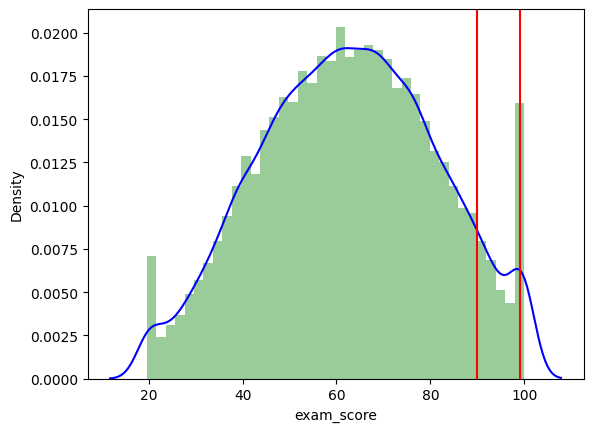

In [103]:
get_PDF_probablity(dataset['exam_score'],90,99)

In [129]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['sleep_hours'])
ecdf(7)

0.5058

In [94]:
#!pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 9.5/9.5 MB 59.5 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmo

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pingouin 0.5.5 requires seaborn, which is not installed.
pingouin 0.5.5 requires tabulate, which is not installed.


In [132]:
# Bivariate
qual_data = pd.get_dummies(dataset[qual], drop_first=True,dtype='int')
qual_data

,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,internet_access_yes,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1
2,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
19997,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0
19998,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1


In [133]:
quan_data = dataset[quan]
quan_data

,age,study_hours,class_attendance,sleep_hours,exam_score
0,17,2.78,92.9,7.4,58.9
1,23,3.37,64.8,4.6,54.8
2,22,7.88,76.8,8.5,90.3
3,20,0.67,48.4,5.8,29.7
4,20,0.89,71.6,9.8,43.7
...,...,...,...,...,...
19995,18,6.50,71.3,5.0,86.5
19996,18,3.71,41.6,5.9,60.9
19997,19,7.88,68.2,4.6,64.5
19998,19,4.60,76.3,6.1,79.0


In [134]:
final_data = pd.concat([quan_data, qual_data], axis=1)
final_data

,age,study_hours,class_attendance,sleep_hours,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,17,2.78,92.9,7.4,58.9,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,23,3.37,64.8,4.6,54.8,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,22,7.88,76.8,8.5,90.3,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,20,0.67,48.4,5.8,29.7,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,20,0.89,71.6,9.8,43.7,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,6.50,71.3,5.0,86.5,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
19996,18,3.71,41.6,5.9,60.9,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
19997,19,7.88,68.2,4.6,64.5,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
19998,19,4.60,76.3,6.1,79.0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1


In [135]:
final_data = pd.concat([quan_data, qual_data], axis=1)
final_data

,age,study_hours,class_attendance,sleep_hours,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,17,2.78,92.9,7.4,58.9,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,23,3.37,64.8,4.6,54.8,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,22,7.88,76.8,8.5,90.3,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,20,0.67,48.4,5.8,29.7,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,20,0.89,71.6,9.8,43.7,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,18,6.50,71.3,5.0,86.5,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
19996,18,3.71,41.6,5.9,60.9,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
19997,19,7.88,68.2,4.6,64.5,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
19998,19,4.60,76.3,6.1,79.0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1


In [147]:
final_data.columns.size

24

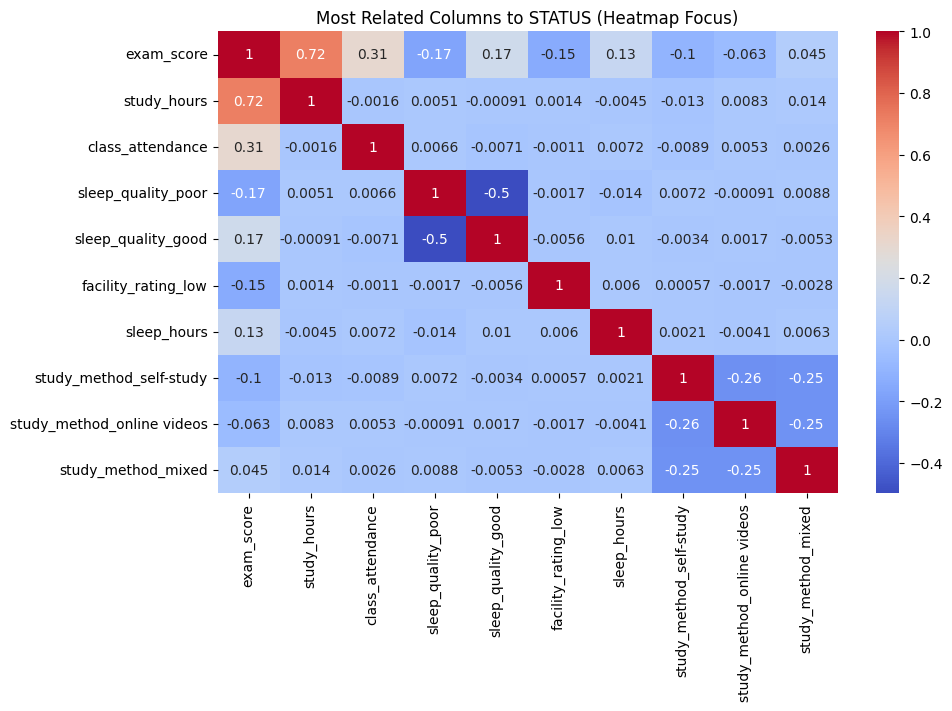

In [148]:
import matplotlib.pyplot as plt
corr_with_status = final_data.corr()['exam_score'].abs().sort_values(ascending=False)
# top_cols = corr_with_status.head(dataset.columns.size).index   
top_cols = corr_with_status.head(10).index    # top 10 most related columns
plt.figure(figsize=(10,6))
sns.heatmap(final_data[top_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Most Related Columns to STATUS (Heatmap Focus)")
plt.show()

In [149]:
from scipy.stats import norm

mu = final_data['exam_score'].mean()
sigma = final_data['exam_score'].std()

# Probability between 70 and 90
probability = norm.cdf(90, mu, sigma) - norm.cdf(70, mu, sigma)

print("Probability:", probability)

Probability: 0.2730533717869358


In [143]:
corr_with_salary = final_data.corr()['exam_score']
corr_with_salary.sort_values(ascending=False)


exam_score                    1.000000
study_hours                   0.717788
class_attendance              0.308850
sleep_quality_good            0.172049
sleep_hours                   0.133222
study_method_mixed            0.044980
facility_rating_medium        0.010613
course_bba                    0.008920
age                           0.006522
course_b.sc                   0.004462
exam_difficulty_hard          0.003068
course_b.tech                 0.002993
gender_other                  0.001799
exam_difficulty_moderate      0.001779
course_bca                    0.000236
course_diploma               -0.003917
gender_male                  -0.004342
internet_access_yes          -0.007826
course_ba                    -0.008727
study_method_group study     -0.040377
study_method_online videos   -0.063120
study_method_self-study      -0.101278
facility_rating_low          -0.146083
sleep_quality_poor           -0.172257
Name: exam_score, dtype: float64

In [151]:
final_data['exam_score'].corr(final_data['study_hours'])

0.7177879939079734

In [153]:
# Model creation
final_data.columns

Index(['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score',
       'gender_male', 'gender_other', 'course_b.sc', 'course_b.tech',
       'course_ba', 'course_bba', 'course_bca', 'course_diploma',
       'internet_access_yes', 'sleep_quality_good', 'sleep_quality_poor',
       'study_method_group study', 'study_method_mixed',
       'study_method_online videos', 'study_method_self-study',
       'facility_rating_low', 'facility_rating_medium', 'exam_difficulty_hard',
       'exam_difficulty_moderate'],
      dtype='object')

In [162]:
# Feature selection
indepent = df.drop(columns=['exam_score'])
depend = df['exam_score']

In [163]:
depend

0        58.9
1        54.8
2        90.3
3        29.7
4        43.7
         ... 
19995    86.5
19996    60.9
19997    64.5
19998    79.0
19999    71.0
Name: exam_score, Length: 20000, dtype: float64

In [164]:
corr = df.corr(numeric_only=True)['exam_score'].sort_values(ascending=False)
print(corr)

exam_score          1.000000
study_hours         0.717788
class_attendance    0.308850
sleep_hours         0.133222
age                 0.006522
Name: exam_score, dtype: float64


In [167]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor
)
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score


def feature_selection_10_algorithms(
    df,
    target_col,
    k_best=10,
    importance_threshold=0.01,
    test_size=0.2,
    random_state=42
):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = []

    def evaluate(features, model):
        if len(features) == 0:
            return 0
        model.fit(X_train[features], y_train)
        return r2_score(y_test, model.predict(X_test[features]))

    # 1️⃣ Correlation
    corr = df.corr(numeric_only=True)[target_col].abs().sort_values(ascending=False)
    corr_features = corr[corr > corr.mean()].index.drop(target_col, errors="ignore").tolist()
    results.append({
        "Algorithm": "Correlation",
        "R2_Score": round(evaluate(corr_features, RandomForestRegressor()), 4),
        "No_of_Features": len(corr_features),
        "Selected_Features": corr_features
    })

    # 2️⃣ SelectKBest
    skb = SelectKBest(f_regression, k=k_best).fit(X_train, y_train)
    skb_features = X.columns[skb.get_support()].tolist()
    results.append({
        "Algorithm": "SelectKBest",
        "R2_Score": round(evaluate(skb_features, RandomForestRegressor()), 4),
        "No_of_Features": len(skb_features),
        "Selected_Features": skb_features
    })

    # 3️⃣ Mutual Information
    mi = mutual_info_regression(X_train, y_train)
    mi_features = X.columns[mi > np.mean(mi)].tolist()
    results.append({
        "Algorithm": "MutualInformation",
        "R2_Score": round(evaluate(mi_features, RandomForestRegressor()), 4),
        "No_of_Features": len(mi_features),
        "Selected_Features": mi_features
    })

    # 4️⃣ Lasso
    lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train)
    lasso_features = X.columns[lasso.coef_ != 0].tolist()
    results.append({
        "Algorithm": "Lasso",
        "R2_Score": round(evaluate(lasso_features, RandomForestRegressor()), 4),
        "No_of_Features": len(lasso_features),
        "Selected_Features": lasso_features
    })

    # 5️⃣ ElasticNet
    en = ElasticNet(alpha=0.01).fit(X_train_scaled, y_train)
    en_features = X.columns[en.coef_ != 0].tolist()
    results.append({
        "Algorithm": "ElasticNet",
        "R2_Score": round(evaluate(en_features, RandomForestRegressor()), 4),
        "No_of_Features": len(en_features),
        "Selected_Features": en_features
    })

    # 6️⃣ Ridge
    ridge = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
    ridge_features = X.columns[np.abs(ridge.coef_) > np.mean(np.abs(ridge.coef_))].tolist()
    results.append({
        "Algorithm": "Ridge",
        "R2_Score": round(evaluate(ridge_features, RandomForestRegressor()), 4),
        "No_of_Features": len(ridge_features),
        "Selected_Features": ridge_features
    })

    # 7️⃣ Random Forest
    rf = RandomForestRegressor(n_estimators=300, random_state=random_state).fit(X_train, y_train)
    rf_features = X.columns[rf.feature_importances_ > importance_threshold].tolist()
    results.append({
        "Algorithm": "RandomForest",
        "R2_Score": round(r2_score(y_test, rf.predict(X_test)), 4),
        "No_of_Features": len(rf_features),
        "Selected_Features": rf_features
    })

    # 8️⃣ Extra Trees
    et = ExtraTreesRegressor(n_estimators=300, random_state=random_state).fit(X_train, y_train)
    et_features = X.columns[et.feature_importances_ > importance_threshold].tolist()
    results.append({
        "Algorithm": "ExtraTrees",
        "R2_Score": round(r2_score(y_test, et.predict(X_test)), 4),
        "No_of_Features": len(et_features),
        "Selected_Features": et_features
    })

    # 9️⃣ Gradient Boosting
    gb = GradientBoostingRegressor(random_state=random_state).fit(X_train, y_train)
    gb_features = X.columns[gb.feature_importances_ > importance_threshold].tolist()
    results.append({
        "Algorithm": "GradientBoosting",
        "R2_Score": round(r2_score(y_test, gb.predict(X_test)), 4),
        "No_of_Features": len(gb_features),
        "Selected_Features": gb_features
    })

    # 🔟 Permutation Importance
    perm = permutation_importance(
        rf, X_test, y_test, n_repeats=10, random_state=random_state
    )
    perm_features = X.columns[perm.importances_mean > np.mean(perm.importances_mean)].tolist()
    results.append({
        "Algorithm": "PermutationImportance",
        "R2_Score": round(evaluate(perm_features, RandomForestRegressor()), 4),
        "No_of_Features": len(perm_features),
        "Selected_Features": perm_features
    })

    result_df = pd.DataFrame(results).sort_values(
        by="R2_Score", ascending=False
    ).reset_index(drop=True)

    best_model = result_df.iloc[0]["Algorithm"]
    best_features = result_df.iloc[0]["Selected_Features"]

    return result_df, best_model, best_features


In [168]:
table, best_algo, best_features = feature_selection_10_algorithms(
    df,
    target_col="exam_score"
)

print(table)
print("\nBest Algorithm:", best_algo)
print("Best Features:", best_features)


               Algorithm  R2_Score  No_of_Features  \
0       GradientBoosting    0.6230               3   
1           RandomForest    0.5853               4   
2            SelectKBest    0.5830               4   
3                  Lasso    0.5827               4   
4             ElasticNet    0.5813               4   
5             ExtraTrees    0.5753               4   
6                  Ridge    0.5257               2   
7  PermutationImportance    0.5040               1   
8      MutualInformation    0.5039               1   
9            Correlation    0.5037               1   

                                   Selected_Features  
0       [study_hours, class_attendance, sleep_hours]  
1  [age, study_hours, class_attendance, sleep_hours]  
2  [age, study_hours, class_attendance, sleep_hours]  
3  [age, study_hours, class_attendance, sleep_hours]  
4  [age, study_hours, class_attendance, sleep_hours]  
5  [age, study_hours, class_attendance, sleep_hours]  
6                   

In [169]:
from sklearn.model_selection import train_test_split

final_features = ['study_hours', 'class_attendance', 'sleep_hours']

X = df[final_features]
y = df['exam_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [170]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [172]:
from sklearn.metrics import r2_score
y_pred = gb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)


print("R2 Score :", round(r2, 4))



R2 Score : 0.6234


In [175]:
predicted_score = gb_model.predict([[6, 85, 7]])
predicted_score

array([78.40696977])

In [176]:
import joblib

joblib.dump(gb_model, "exam_score_gb_model.pkl")


['exam_score_gb_model.pkl']

In [178]:
model = joblib.load("exam_score_gb_model.pkl")


In [179]:
model.predict([[6, 85, 7]])

array([78.40696977])